In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file to analyze the data
file_path = 'Sales Data.csv'
sales_data = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
sales_data_info = sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
# Display the first few rows of the dataset to understand its structure
sales_data_head = sales_data.head()

sales_data_info, sales_data_head

(None,
    Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each   
 0           0    295665    Macbook Pro Laptop                 1     1700.00  \
 1           1    295666    LG Washing Machine                 1      600.00   
 2           2    295667  USB-C Charging Cable                 1       11.95   
 3           3    295668      27in FHD Monitor                 1      149.99   
 4           4    295669  USB-C Charging Cable                 1       11.95   
 
             Order Date                        Purchase Address  Month   
 0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  \
 1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
 2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
 3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
 4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   
 
      Sales            City  Hour  
 0  1700.00   New York City  

In [5]:
# Descriptive Statistics for numeric columns
numeric_descriptive_stats = sales_data.describe()

In [6]:
# Frequency counts for categorical columns
categorical_frequency_counts = {
    'Product': sales_data['Product'].value_counts(),
    'City': sales_data['City'].value_counts()
}


In [7]:
# Checking for missing values
missing_values = sales_data.isnull().sum()

In [8]:
# Display the results
numeric_descriptive_stats, categorical_frequency_counts, missing_values

(          Unnamed: 0       Order ID  Quantity Ordered     Price Each   
 count  185950.000000  185950.000000     185950.000000  185950.000000  \
 mean     8340.388475  230417.569379          1.124383     184.399735   
 std      5450.554093   51512.737110          0.442793     332.731330   
 min         0.000000  141234.000000          1.000000       2.990000   
 25%      3894.000000  185831.250000          1.000000      11.950000   
 50%      7786.000000  230367.500000          1.000000      14.950000   
 75%     11872.000000  275035.750000          1.000000     150.000000   
 max     25116.000000  319670.000000          9.000000    1700.000000   
 
                Month          Sales           Hour  
 count  185950.000000  185950.000000  185950.000000  
 mean        7.059140     185.490917      14.413305  
 std         3.502996     332.919771       5.423416  
 min         1.000000       2.990000       0.000000  
 25%         4.000000      11.950000      11.000000  
 50%         7.00

In [9]:
# Setting up the visualization style
sns.set(style="whitegrid")

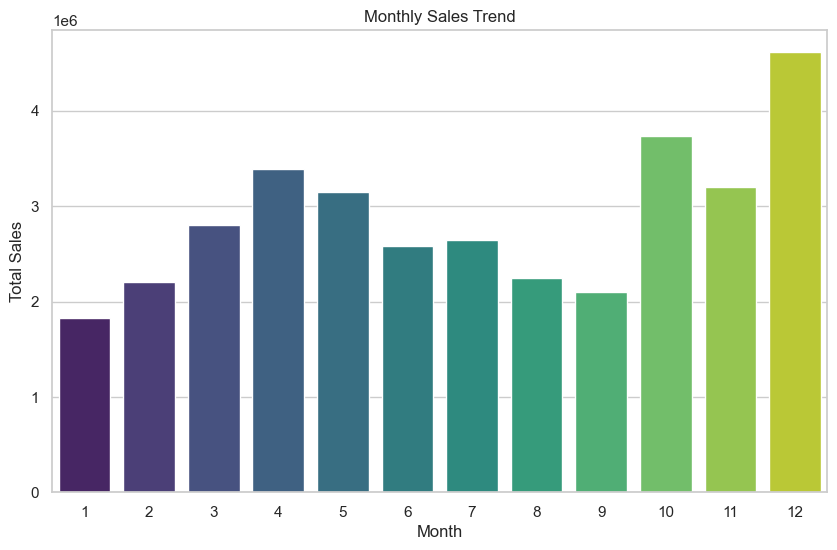

In [10]:
# Monthly Sales Trend
monthly_sales = sales_data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales', palette='viridis')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

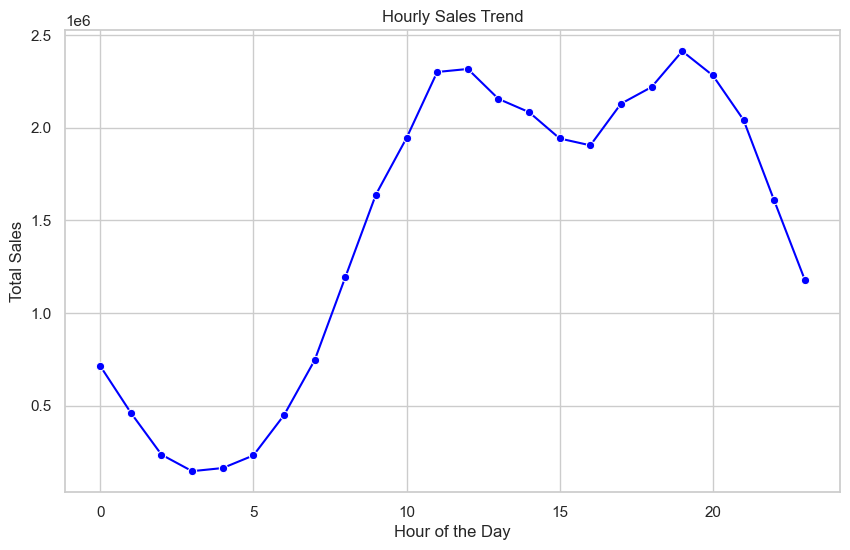

In [11]:
# Hourly Sales Trend
hourly_sales = sales_data.groupby('Hour')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales', marker='o', color='blue')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

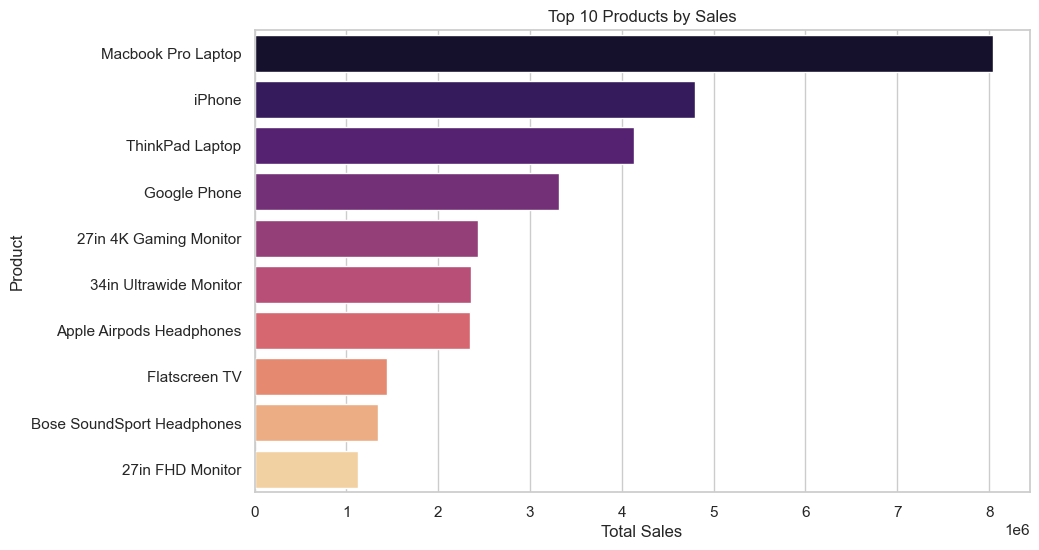

In [12]:
# Top Products by Sales
top_products_sales = sales_data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_sales, x='Sales', y='Product', palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

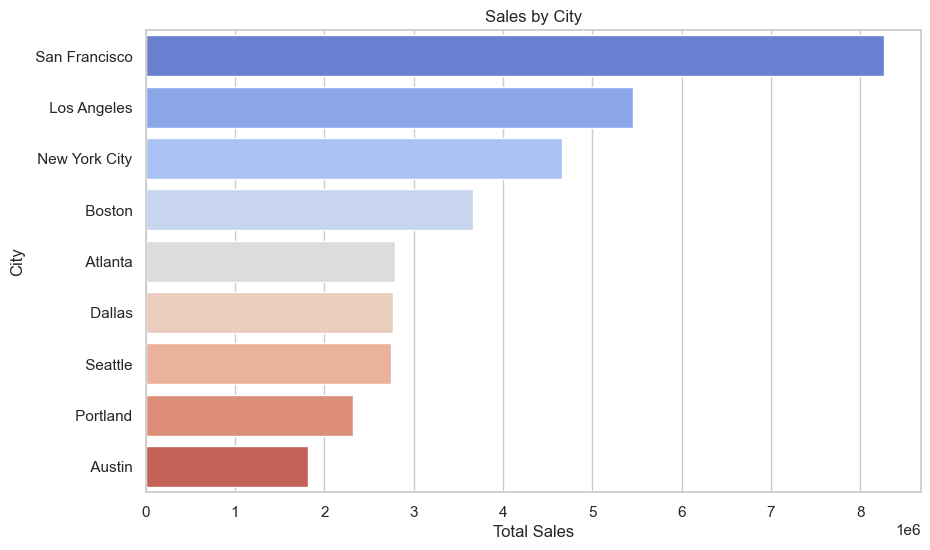

In [13]:
# Sales by City
city_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=city_sales, x='Sales', y='City', palette='coolwarm')
plt.title('Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

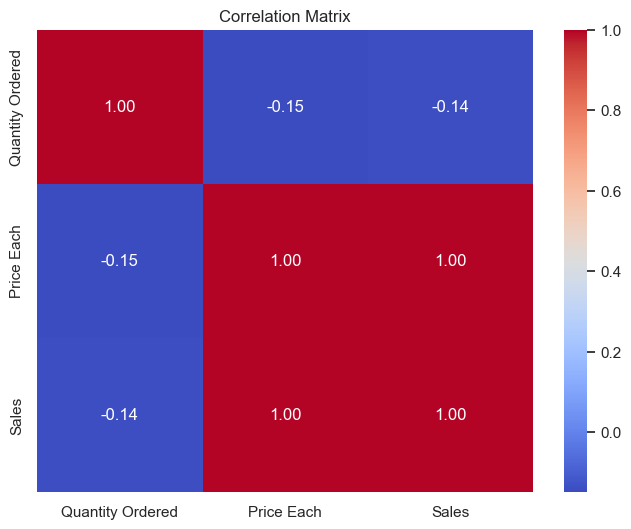

                  Quantity Ordered  Price Each     Sales
Quantity Ordered          1.000000   -0.148272 -0.139417
Price Each               -0.148272    1.000000  0.999203
Sales                    -0.139417    0.999203  1.000000


In [16]:
# Correlation analysis between quantity ordered, price each, and sales
correlation_matrix = sales_data[['Quantity Ordered', 'Price Each', 'Sales']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

<Figure size 1200x800 with 0 Axes>

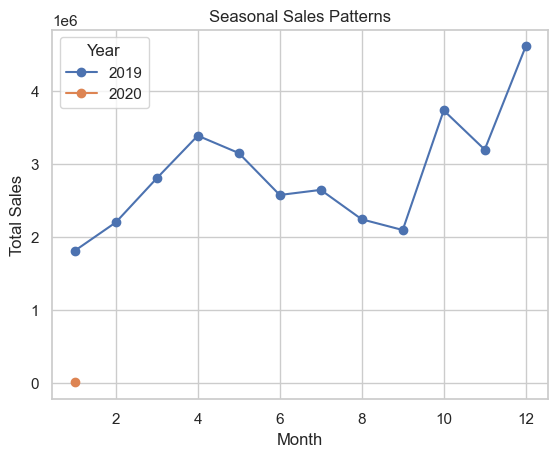

In [17]:
# Extracting month and year from the Order Date
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Year'] = sales_data['Order Date'].dt.year

# Grouping by Year and Month to identify seasonal patterns
monthly_sales_trend = sales_data.groupby(['Year', 'Month'])['Sales'].sum().unstack()

# Visualizing the seasonal patterns
plt.figure(figsize=(12, 8))
monthly_sales_trend.T.plot(kind='line', marker='o')
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

Mean Squared Error: 111306.32356171988


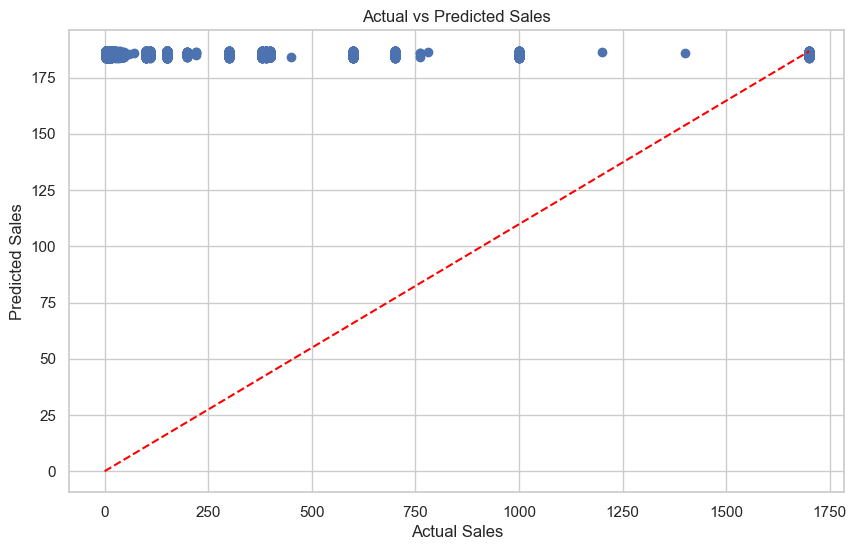

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing data for predictive analysis
features = sales_data[['Month', 'Hour']]
target = sales_data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([0, max(y_test)], [0, max(predictions)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()